Neuromorphic engineering I

## Lab 2: Transistor superthreshold saturation current and drain characteristics

Group number: 4.5

Team member 1: Jan Hohenheim

Team member 2: Maxim Gärtner

Date:

-------------------------------------------------------------------------------------------------------------------

The objective of this lab is to understand _super-threshold_ ( also called _above-threshold_ or _strong inversion_ ) transistor operation and to understand transistor drain conductance characteristics, particularly _channel length modulation_.

The specific experimental **objectives of this lab**  are as follows: 
1. To characterize drain current of a transistor as a function of gate voltage in superthreshold operation in the ohmic (triode) and saturation regions.
2. To characterize the drain saturation properties in super-threshold.
3. To characterize drain conductance (the Early effect) and how it scales with transistor length (may not be possible this year) and saturation drain current.

An intuitive and quantitative understanding of all these effects, along with the subthreshold behavior (next week), is useful for the design of effective circuits, especially analog design of high performance amplifiers.

# 1 Terminology

- above-threshold = super-threshold =  strong inversion
- sub-threshold = below-threshold = weak inversion
- triode region = ohmic region = linear drain conductance behavior with small drain-source voltage
- saturation = large $V_{\rm ds}$ 
- overdrive = $V_{\rm g}-V_{\rm T}$
- $U_{\rm T} = kT/q$ = thermal voltage = 25mV at room temperature
- $V_{\rm T}$ = threshold voltage = 0.4V to 0.8V depending on process


# 2 Useful Quantities

The following is a list of the physical parameters and constants we
will be referring to in this lab, along with their values when
appropriate. The units that are most natural for these quantities are
also included; these units are not self--consistent, so make sure you
convert the units when appropriate.


$\epsilon_0$ :  Permittivity of vacuum = $8.86\times10^{-12} \rm{ F/m}$ 

$\epsilon_{Si}$ : Relative permittivity of ${\rm Si}$ = $11.7\epsilon_0$ 

$\epsilon_{ox}$ : Relative permittivity of ${\rm SiO_2}$ = $3.9\epsilon_0$ 

$\mu_n$ : electron surface mobility, ${\rm cm^2/V/s}$ 
 
$\mu_p$ : hole surface mobility, ${\rm cm^2/V/s}$

$C_{ox}$ : gate capacitance across the oxide per unit area,
	${\rm fF/\mu m^{2}}$ 

$C_{dep}$ : capacitance of depletion region per unit area,
	${\rm fF/\mu m^{2}}$ 

$t_{ox}$ : gate oxide thickness $\approx$
	3.8 nm for the class chip in 180 nm techology.
	
$V_T$ : threshold voltage, V ($V_{T0}$ is $V_T$ when $V_s$ = 0).


$W$ : electrical width of transistor channel, $= 4~\mu m$ for both devices in this lab 

$L$ : electrical length of transistor channel, $= 4~\mu m$ for both devices in this lab

$\beta$ $\equiv \mu C_{ox} W/L,\;\mu{\rm A/V^2}$ 

$V_E$ : Early voltage, characterizes drain conductance. 


# 3 Prelab

Write the expressions/eqations in LaTeX, like $Vod$ = $V_{\rm g}-V_{\rm T}$, or upload the pictures of handwritten expressions.

* For nFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tn}>0$.

> For triode: $I_{ds} = \beta(V_g - V_s - V_{Tn})(V_d - V_s)$  
> For saturation: $I_{ds} = \frac{1}{2}\beta(V_g - V_s - V_{Tn})^2$

* For pFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tp}<0$.

> For triode: $I_{ds} = \beta(V_s - V_g + V_{Tp})(V_s - V_d)$  
> For saturation: $I_{ds} = \frac{1}{2}\beta(V_s - V_g + V_{Tp})^2$

- For nFET, sketch graphs of $I_{ds}$ vs the $V_d$ for several gate voltages $V_g$ above threshold, with $V_s=0$. Indicate the ohmic and saturation regions and the behavior of the saturation voltage $V_{dsat}$ as the gate overdrive voltage increases. 

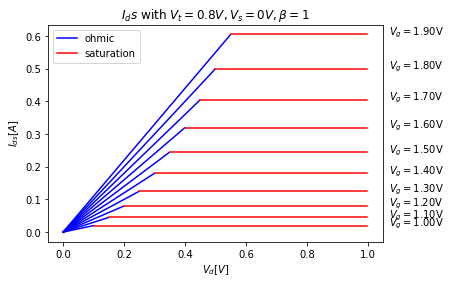

In [74]:
import numpy as np
import matplotlib.pyplot as plt
v_t = 0.8
v_s = 0
beta = 1
for v_g in np.arange(1, 2, 0.1):
    v_d1 = np.arange(0, 1, 0.001)
    v_d2 = np.arange(0, 1, 0.001)
    i_ds1 = beta*(v_g - v_s - v_t)*(v_d1 - v_s)
    i_ds2 = np.repeat(beta*0.5*(v_g - v_s - v_t)**2, 1/0.001)
    index = next(filter(lambda i_ds: abs(i_ds[1][0]-i_ds[1][1]) < 0.0001, enumerate(zip(i_ds1, i_ds2))))[0]
    plt.plot(v_d1[:index], i_ds1[:index], 'b')
    plt.plot(v_d2[index:], i_ds2[index:], 'r')
    plt.text(1.07, i_ds2[-1], f"$V_g = {v_g:.2f}$V")
    plt.title(f"$I_ds$ with $V_t = 0.8V, V_s = 0V, \\beta = 1$")
    plt.xlabel("$V_d[V]$")
    plt.ylabel("$I_{ds}[A]$")
    plt.legend(["ohmic", "saturation"])
plt.show()

> The saturation voltage increases with the overdrive voltage

- For nFET, derive an expression for the current $I_{ds}$ in the ohmic region in terms of $V_g$ and $V_{ds} \equiv V_d-V_s,$. You may assume that $V_s=0.$ Sketch a graph of $I_{ds}$ vs $V_g,$ showing $V_{T0}$ and an expression for the slope.

> $I_{ds} = \beta (V_g - V_{T0})V_d$

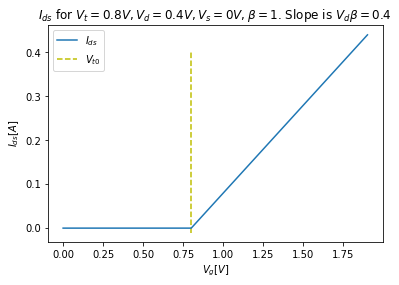

In [67]:
import numpy as np
import matplotlib.pyplot as plt
v_t = 0.8
v_s = 0
beta = 1
v_d = 0.4
v_g = np.arange(0.0, 2, 0.1)
i_ds = beta*(v_g - v_s - v_t)*(v_d - v_s)
i_ds = np.array([max(id, 0) for id in i_ds])
plt.plot(v_g, i_ds, label="$I_{ds}$")
plt.vlines(v_t, -0.01, v_d, colors="y", linestyles="dashed", label="$V_{t0}$")
plt.xlabel("$V_g[V]$")
plt.ylabel("$I_{ds}[A]$")
plt.title("$I_{ds}$ for $V_t = 0.8V, V_d = 0.4V, V_s = 0V, \\beta = 1$. Slope is $V_d \\beta = 0.4$")
plt.legend()
plt.show()

- For nFET, state the drain voltage condition for above-threshold saturation and derive an expression for the saturation current $I_{dsat}$ in terms of $V_g$. Sketch a graph of $\sqrt{I_{dsat}}$ vs $V_g$ with $V_s=0,$ showing $V_{T0}$ and an expression for the slope. Do not consider the Early effect here.

> $I_{dsat} = \frac{1}{2} \beta(V_g - V_{T0})^2$

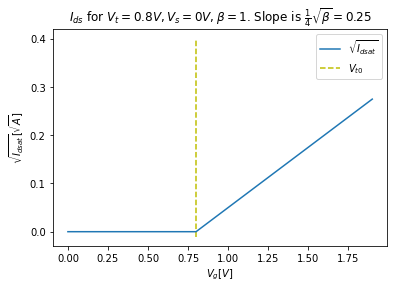

In [84]:
import numpy as np
import matplotlib.pyplot as plt
v_t = 0.8
v_s = 0
beta = 1
v_g = np.arange(0.0, 2, 0.1)
sqrt_i_dsat = np.sqrt(beta)*0.25*(v_g - v_s - v_t)
sqrt_i_dsat = np.array([max(id, 0) for id in sqrt_i_dsat])
plt.plot(v_g, sqrt_i_dsat, label="$\\sqrt{I_{dsat}}$")
plt.vlines(v_t, -0.01, v_d, colors="y", linestyles="dashed", label="$V_{t0}$")
plt.xlabel("$V_g[V]$")
plt.ylabel(r"$\sqrt{I_{dsat}}[\sqrt{A}]$")
plt.title(r"$I_{ds}$ for $V_t = 0.8V, V_s = 0V, \beta = 1$. Slope is $\frac{1}{4}\sqrt{\beta} = 0.25$")
plt.legend()
plt.show()

- Calculate $C_{ox}$ for the classchip from the values given above. What is $C_{ox}$ per square micron in fF?


> $C_{ox} = \frac{\epsilon_{ox}}{t_{ox}}$  
> $C_{ox} = \frac{3.9 \times \epsilon_{0}}{t_{ox}}$  
> $C_{ox} = \frac{3.9 \times 8.86 \times 10^{-12} \frac{\rm{F}}{\rm{m}}}{3.8 \times 10^{-9}\rm{m}}$  
> $C_{ox} = 0.009093\frac{\rm{F}}{\rm{m}^2} = 9093 \frac{\rm{fF}}{\mu \rm{m}^2}$

- Write the expression for the drain current in saturation including the Early effect, using $I_{dsat}$ to  represent the saturation current in the absence of the Early effect.  Use $V_E$ to represent the Early voltage.

> $I_{ds} = I_{dsat} (1+ \frac{V_d - V_s}{V_E})$

# 4 Setup

## 4.1 Connect the device

In [2]:
# import the necessary library to communicate with the hardware
#import sys
#sys.path.append('/home/junren/software/CoACH_Teensy_interface/build/pc/pyplane')

import pyplane
import time

In [3]:
# create a Plane object and open the communication
if 'p' not in locals():
    p = pyplane.Plane()
    try:
        p.open('/dev/ttyACM0') # Open the USB device ttyACM0 (the board). 
    except RuntimeError as e:
        print(e)
        
# Note that if you plug out and plug in the USB device in a short time interval, the operating system might allocate a new name like ttyACM1, 
# then you may get error messages with open(...ttyACM0). So please avoid frenquently plugging in/out the board.

In [4]:
p.get_firmware_version()

(1, 8, 3)

In [5]:
# Send a reset signal to the board, check if the LED blinks
p.reset(pyplane.ResetType.Soft)

<TeensyStatus.Success: 0>

In [6]:
# NOTE: You must send this request events every time you do a reset operetion, otherwise the recieved data is noisy.
# Because the class chip need to handshake with some other devices to get the communication correct.
p.request_events(1)

In [7]:
# Try to read something, make sure the chip responses
p.read_current(pyplane.AdcChannel.GO0_N)

1.8530273848682555e-07

In [7]:
# If any of the above steps fail, delete the object, and restart the kernel

# del p

<a id='config_nfet'></a>
## 4.2 Configurations for N-FET

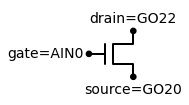

In [8]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

To cancel out the leakage current and shunt resistance, you may need to do a subtraction.

$I_{ds} = I_{GO20} - I_{GO20}|_{V_{gs} = 0}$ 

Note: It's better to measure source because its leakage is constant in this lab

* You have to set the input voltage demultiplexer by sending a configuration event:

In [9]:
# Configure NMOSFET, set the input voltage demultiplexer by AER. 
# Note selectlines we should choose for the NMOSFET

events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

* Check the configuration is correct. If the measured result is not as expected, try sending the configration event again.

In [10]:
# set source voltage
vs = 0.0
p.set_voltage(pyplane.DacChannel.GO20 , vs)
print(f"The source voltage is set to {vs:.2f} V")

The source voltage is set to 0.00 V


In [11]:
# set drain voltage
vd = 1.8
p.set_voltage(pyplane.DacChannel.GO22 , vd)
print(f"The drain voltage is set to {vd:.2f} V")

The drain voltage is set to 1.80 V


In [12]:
# set gate voltage
vg = 1.0
p.set_voltage(pyplane.DacChannel.AIN0, vg)
print(f"The gate voltage is set to {vg:.2f} V")

The gate voltage is set to 1.00 V


In [13]:
# read I_{ds}
I_s = p.read_current(pyplane.AdcChannel.GO20_N)      #source
print(f"The measured source current is {I_s} A")
I_d = p.read_current(pyplane.AdcChannel.GO22)       #drain
print(f"The measured drain current is {I_d} A")

The measured source current is 1.8554686903371476e-05 A
The measured drain current is 2.0117187887080945e-05 A


* Question: Check if the measured currents change with different gate voltages?

> Yes, a higher gate voltage will cause a higher current.

<a id='config_pfet'></a>
## 4.3 Configurations for P-FET

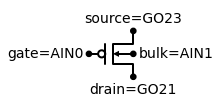

In [14]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.PFet, reverse=True, bulk=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.bulk, rgtlabel='bulk=AIN1')
d.add(elm.Dot, xy=Q.drain, botlabel='drain=GO21')
d.add(elm.Dot, xy=Q.source, toplabel='source=GO23')
d.draw()

Hint: To cancel out the leakage current and shunt resistance, you may need to do a subtraction:

$I_{ds} = I_{GO23} - I_{GO23}|_{V_{gs} = 0} $

Note: It's better to measure source because its leakage is constant in this lab. 
Also think about the difference of $V_{gs}$ between PMOS and NMOS?

* You have to choose the input voltage demultiplexer by sending a configuration event (make sure LED1 blinks):

In [15]:
# Configure PMOS, set the demultiplexer
# Note selectlines we should choose for the PMOSFET
# Note that SelectLine2 became SelectLine3. See the on page 12 of the manual.
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine1, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

* Check the configuration is correct. If the measured result is not as expected, try sending the event again.

In [16]:
# set trial voltages
Vs_p = 1.8
Vd_p = 0.0
Vg_p = 1.0

# set bulk voltage
# If the bulk voltage is not the source voltage, we will get an np junction
# If the bulk is lower than the source voltage, we will get the wrong flow of current
# So if we want to change the threshold, we could set the bulk voltage a bit higher than the source voltage
# But the bulk voltage should always be the highest (in PFET)
Vb_p = Vs_p


print("The bulk voltage is set to {} V".format(Vb_p))
p.set_voltage(pyplane.DacChannel.AIN1, Vb_p)
time.sleep(0.05)  # wait 0.05s for it to settle

# set source voltage
p.set_voltage(pyplane.DacChannel.GO23 , Vs_p)
print("The source voltage is set to {} V".format(Vs_p))
time.sleep(0.05)  # wait 0.05s for it to settle

# set drain voltage
p.set_voltage(pyplane.DacChannel.GO21 , Vd_p)
print("The drain voltage is set to {} V".format(Vd_p))
time.sleep(0.05)  # wait for it to settle

# set gate voltage
p.set_voltage(pyplane.DacChannel.AIN0, Vg_p)
print("The gate voltage is set to {} V".format(Vg_p))

The bulk voltage is set to 1.8 V
The source voltage is set to 1.8 V
The drain voltage is set to 0.0 V
The gate voltage is set to 1.0 V


In [17]:
# read I_{ds}
Is_p = p.read_current(pyplane.AdcChannel.GO23)      #source
print(f"The measured source current of PMOS is {Is_p} A")

Id_p = p.read_current(pyplane.AdcChannel.GO21_N)       #drain
print(f"The measured drain current of PMOS is {Id_p} A")

The measured source current of PMOS is 9.992675768444315e-05 A
The measured drain current of PMOS is 8.544922138753464e-07 A


# 5 Ohmic region

In this experiment you will characterize the *linear* dependence of the current on the gate
voltage in the strong-inversion ohmic region.

## 5.1 N-FET

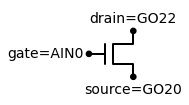

In [18]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

**(a)** Configure the chip following [Section 4.2](#config_nfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region

In [67]:
# set the demultiplexer, NMOS
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

* What will be the fixed value for source and drain voltages?

Answer: 

In [148]:
# set source voltage
Vs = 0.0
p.set_voltage(pyplane.DacChannel.GO20 , Vs)

0.0

In [152]:
# set drain voltage
Vd = 0.2
p.set_voltage(pyplane.DacChannel.GO22 , Vd)

0.19882699847221375

* For very close voltages, you may want to call `get_set_voltage` to check the actual output of the DAC.

In [128]:
# get set voltage
Vs_n = p.get_set_voltage(pyplane.DacChannel.GO20)
print("The source voltage is set to {} V".format(Vs_n))

# get set voltage
Vd_n = p.get_set_voltage(pyplane.DacChannel.GO22)
print("The drain voltage is set to {} V".format(Vd_n))

The source voltage is set to 0.49970680475234985 V
The drain voltage is set to 1.7982406616210938 V


* Data aquisition

In [153]:
# sweep gate voltage
import time
import numpy as np 

# Get the leakage current, Read Ids=Ids0 at Vg = 0
p.set_voltage(pyplane.DacChannel.AIN0, 0.0)
time.sleep(0.5) # wait 0.5 second for it to settle
Is0_n = p.read_current(pyplane.AdcChannel.GO20_N)
print(f"Offset Is0_n: {Is0_n} A")

Vgs = np.arange(0.0, 1.8, 0.1)
Ids = []

for Vg in Vgs:
    # set gate voltage
    p.set_voltage(pyplane.DacChannel.AIN0, Vg)
    
    print(f"The gate voltage is set to {Vg:.2f} V")   ## print the gate voltage
    
    time.sleep(0.05)  # wait for it to settle
    # read I_{ds}
    Id = p.read_current(pyplane.AdcChannel.GO20_N)
    
    print(f"The measured source current is {Id} A")  ## print the raw data
    
    # substract leakage current    
    Id -= Is0_n
    print(f"The leakage corrected Ids is {Id}")
    Ids.append(Id)

        

Offset Is0_n: 1.367187451251084e-06 A
The gate voltage is set to 0.00 V
The measured source current is 1.6601562720097718e-06 A
The leakage corrected Ids is 2.929688207586878e-07
The gate voltage is set to 0.10 V
The measured source current is 7.080078034960025e-07 A
The leakage corrected Ids is -6.591796477550815e-07
The gate voltage is set to 0.20 V
The measured source current is 4.1503906800244295e-07 A
The leakage corrected Ids is -9.52148383248641e-07
The gate voltage is set to 0.30 V
The measured source current is 8.78906234902388e-07 A
The leakage corrected Ids is -4.88281216348696e-07
The gate voltage is set to 0.40 V
The measured source current is 2.19726558725597e-07 A
The leakage corrected Ids is -1.147460892525487e-06
The gate voltage is set to 0.50 V
The measured source current is 3.41796862812771e-07 A
The leakage corrected Ids is -1.025390588438313e-06
The gate voltage is set to 0.60 V
The measured source current is 7.568359592369234e-07 A
The leakage corrected Ids is -6

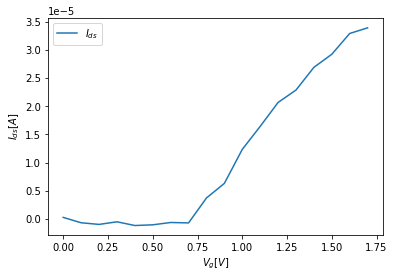

In [154]:
# plot 
from matplotlib import pyplot as plt

plt.plot(Vgs, Ids, label="$I_{ds}$")
plt.legend()
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{g}[V]$")
plt.show()

In [155]:
# if the data looks nice, save it!

# example :
Lab2_data_nFETVgIds = [Vgs,Ids]
# save to csv file
np.savetxt('./data/Lab2_data_nFETVgIds.csv', Lab2_data_nFETVgIds, delimiter=',')

In [96]:
Vgs, Ids = np.loadtxt('./data/Lab2_data_nFETVgIds.csv', delimiter=',')

In [97]:
# extract the valid range
v_t0 = next(Vg for Vg, Id in zip(Vgs, Ids) if Id > 1e-6)
print(f"Threshold value is at Vg = {v_t0}")
ohmic_start_index = Vgs.tolist().index(v_t0)


Threshold value is at Vg = 0.8


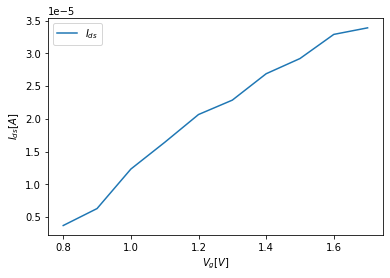

In [98]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)
plt.plot(Vgs[ohmic_start_index:], Ids[ohmic_start_index:], label="$I_{ds}$")
plt.legend()
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{g}[V]$")
plt.show()

**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [99]:
# V_T0
v_t0 = Vgs[ohmic_start_index]
print(f"v_t0: {v_t0}")

v_t0: 0.8


In [100]:
# beta => m/Vd
delta_Ids = Ids[-1] - Ids[ohmic_start_index]
delta_Vgs = Vgs[-1] - Vgs[ohmic_start_index]
m = delta_Ids / delta_Vgs
beta_n = m/Vd

print(f"Beta: {beta_n}")

Beta: 4.19108080980853e-05


> For triode: $I_{ds} = \beta(V_g - V_s - V_{Tn})(V_d - V_s)$  
> For saturation: $I_{ds} = \frac{1}{2}\beta(V_g - V_s - V_{Tn})^2$

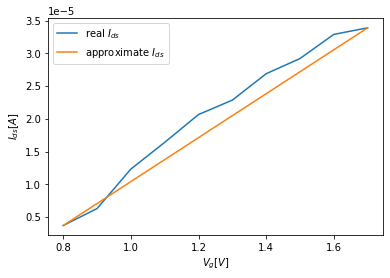

In [111]:
plt.plot(Vgs[ohmic_start_index:], Ids[ohmic_start_index:], label="real $I_{ds}$")
Ids_approx = m*(Vgs[ohmic_start_index:] - v_t0) + Ids[ohmic_start_index]
plt.plot(Vgs[ohmic_start_index:], Ids_approx, label="approximate $I_{ds}$")
plt.legend()
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{g}[V]$")
plt.show()

## 5.2 P-FET

**(a)** Configure the chip following [Section 4.3](#config_pfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region

* What will be the fixed value for bulk, source and drain voltages?

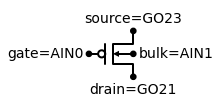

In [6]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.PFet, reverse=True, bulk=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.bulk, rgtlabel='bulk=AIN1')
d.add(elm.Dot, xy=Q.drain, botlabel='drain=GO21')
d.add(elm.Dot, xy=Q.source, toplabel='source=GO23')
d.draw()

In [7]:
# Send a reset signal to the board, check if the LED blinks
p.reset(pyplane.ResetType.Soft)

<TeensyStatus.Success: 0>

In [8]:
# Configure PMOS, set the demultiplexer
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine1, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

In [38]:
# set bulk voltage
p.set_voltage(pyplane.DacChannel.AIN1, 1.8)

time.sleep(0.05)  # wait for it to settle

# set source voltage
p.set_voltage(pyplane.DacChannel.GO23, 1.8)

# set drain voltage
vd = p.set_voltage(pyplane.DacChannel.GO21, 0.8)

# Print I_ds for checking 
Ids = p.read_current(pyplane.AdcChannel.GO21_N)
print(f"Ids: {Ids}")

NameError: name 'p' is not defined

* For very close voltages, you may want to call `get_set_voltage` to check the actual output of the DAC.

In [37]:
# get set voltage
Vs_n = p.get_set_voltage(pyplane.DacChannel.GO23)
print("The source voltage is set to {} V".format(Vs_n))

# get set voltage
Vd_n = p.get_set_voltage(pyplane.DacChannel.GO21)
print("The drain voltage is set to {} V".format(Vd_n))

NameError: name 'p' is not defined

* Data aquisition

In [45]:
# sweep gate voltage
# sweep gate voltage
import time
import numpy as np 

# Get the leakage current, Read Ids=Ids0 at Vg = 0
p.set_voltage(pyplane.DacChannel.AIN0, 0.0)
time.sleep(0.5) # wait 0.5 second for it to settle
Is0_n = p.read_current(pyplane.AdcChannel.GO21_N)
print(f"Offset Is0_n: {Is0_n} A")

Vgs = np.arange(0.0, 1.8, 0.1)
Ids = []

for Vg in Vgs:
    # set gate voltage
    p.set_voltage(pyplane.DacChannel.AIN0, Vg)
    
    print(f"The gate voltage is set to {Vg:.2f} V")   ## print the gate voltage
    
    time.sleep(0.05)  # wait for it to settle
    # read I_{ds}
    Id = p.read_current(pyplane.AdcChannel.GO21_N)
    
    print(f"The measured source current is {Id} A")  ## print the raw data
    
    # substract leakage current    
    Id -= Is0_n
    print(f"The leakage corrected Ids is {Id}")
    Ids.append(Id)


Offset Is0_n: 2.6977539164363407e-05 A
The gate voltage is set to 0.00 V
The measured source current is 2.8588867280632257e-05 A
The leakage corrected Ids is 1.6113281162688509e-06
The gate voltage is set to 0.10 V
The measured source current is 2.5219726012437604e-05 A
The leakage corrected Ids is -1.7578131519258022e-06
The gate voltage is set to 0.20 V
The measured source current is 2.2167969291331246e-05 A
The leakage corrected Ids is -4.80956987303216e-06
The gate voltage is set to 0.30 V
The measured source current is 1.4868163816572633e-05 A
The leakage corrected Ids is -1.2109375347790774e-05
The gate voltage is set to 0.40 V
The measured source current is 1.540527409815695e-05 A
The leakage corrected Ids is -1.1572265066206455e-05
The gate voltage is set to 0.50 V
The measured source current is 1.220703143189894e-05 A
The leakage corrected Ids is -1.4770507732464466e-05
The gate voltage is set to 0.60 V
The measured source current is 8.15429666545242e-06 A
The leakage correcte

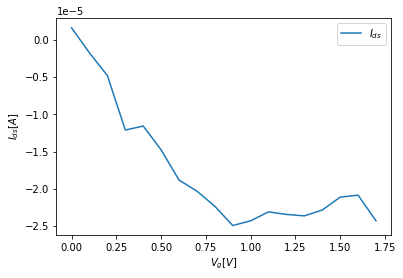

In [46]:
# plot 
from matplotlib import pyplot as plt

plt.plot(Vgs, Ids, label="$I_{ds}$")
plt.legend()
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{g}[V]$")
plt.show()

In [47]:
# if the data looks nice, save it!
# example :
Lab2_data_pFETVgIds = [Vgs,Ids]
# save to csv file
np.savetxt('./data/Lab2_data_pFETVgIds.csv', Lab2_data_pFETVgIds, delimiter=',')

In [112]:
import numpy as np
import matplotlib.pyplot as plt

Vgs, Ids = np.loadtxt('./data/Lab2_data_pFETVgIds.csv', delimiter=',')

In [113]:
# extract the valid range
v_t0 = next(Vg for Vg, Id in zip(Vgs, Ids) if Id < -2.3e-5)
print(f"Threshold value is at Vg = {v_t0}")
ohmic_end_index = Vgs.tolist().index(v_t0)

Threshold value is at Vg = 0.9


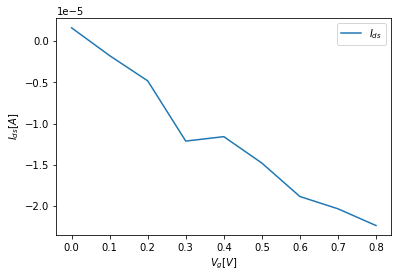

In [114]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)
plt.plot(Vgs[:ohmic_end_index], Ids[:ohmic_end_index], label="$I_{ds}$")
plt.legend()
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{g}[V]$")
plt.show()

**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [115]:
# V_T0
v_t0 = Vgs[ohmic_end_index]
print(f"v_t0: {v_t0}")

v_t0: 0.9


In [116]:
# beta => m/Vd
delta_Ids = Ids[ohmic_end_index] - Ids[0]
delta_Vgs = Vgs[ohmic_end_index] - Vgs[0]
m = delta_Ids / delta_Vgs
beta_p = m / Vd
print(f"Beta: {beta_p}")

Beta: -3.685845292188282e-05


> For triode: $I_{ds} = \beta(V_g - V_s - V_{Tn})(V_d - V_s)$  
> For saturation: $I_{ds} = \frac{1}{2}\beta(V_g - V_s - V_{Tn})^2$

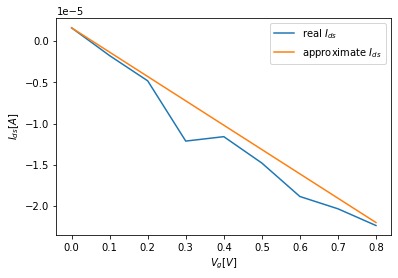

In [132]:
plt.plot(Vgs[:ohmic_end_index], Ids[:ohmic_end_index], label="real $I_{ds}$")
Ids_approx = m*(Vgs[:ohmic_end_index] - v_t0) + Ids[ohmic_end_index]
plt.plot(Vgs[:ohmic_end_index], Ids_approx, label="approximate $I_{ds}$")
plt.legend()
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{g}[V]$")
plt.show()

## 5.3 Comparisons

* Include a single plot showing the curves for both devices.

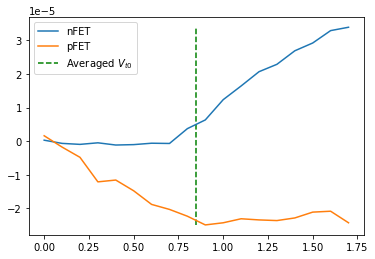

In [134]:
# plot both Ids vs |Vgs|
Vgs, Ids_n = np.loadtxt('./data/Lab2_data_nFETVgIds.csv', delimiter=',')
_, Ids_p = np.loadtxt('./data/Lab2_data_pFETVgIds.csv', delimiter=',')
plt.plot(Vgs, Ids_n, label="nFET")
plt.plot(Vgs, Ids_p, label="pFET")
plt.xlabel = "$V_{gs}$"
plt.ylabel = "$I_{ds}$"
plt.vlines(0.85, min(Ids_p), max(Ids_n), linestyles='dashed', colors="g", label="Averaged $V_{t0}$")
plt.legend()
plt.show()

* What is the ratio between $\beta$ for the 2 devices? Does it make sense?

In [133]:
ratio = beta_n / beta_p
print(f"Beta_n: {beta_n}")
print(f"Beta_p: {beta_p}")
print(f"Ratio: {ratio}")

Beta_n: 4.19108080980853e-05
Beta_p: -3.685845292188282e-05
Ratio: -1.1370745317745798


> Since the curves are mirrored, the ratio should be 1. It is not however, since our pFET measurements suffered from multiple hardware defects, according to our TA.

* Is the relationship between $I_{ds}$ and $V_{gs}-V_T$ really linear? What is likely the cause of any discrepancy?

> It seems to form a slight parabola. I guess this happens because we are getting close to the maximum current that can flow to the channel. At some point, the gate is bound to have diminishing returns.

## 5.4 Effective surface mobility (optional)

Hint: Use the $V_{T0}$ you obtained in the last experiments but assume $\beta$ changes with $V_{gs}$ (thus $\mu_n$ and $\mu_p$ changes). **No need to measure again.**

In [ ]:
# plot mu vs Vgs for both devices in the same figure

- Why does the mobility peak and then decay instead of remaining constant? 

- What is the ratio between the peak mobilities for electrons and holes?

- How different are these values from the bulk mobilities for electrons (1350 ${\rm cm^2/V/s}$) and holes (480 ${\rm cm^2/V/s}$)? 

# 6 Drain Current in the saturation region

In this experiment you will characterize the _quadratic_ dependence of the current on the gate
voltage in the saturation region. 

## 6.1 N-FET

**(a)** Configure the chip following [Section 4.2](#config_nfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in saturation region

* What will be the fixed value for source and drain voltages?

In [21]:
## configure NMOS
# set the demultiplexer, NMOS
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

In [22]:
# set source voltage
p.set_voltage(pyplane.DacChannel.GO20, 0.0)

0.0

In [23]:
# set drain voltage     #######1.8
p.set_voltage(pyplane.DacChannel.GO22, 1.8)


1.7982406616210938

* Data aquisition

In [24]:
# sweep gate voltage
# sweep gate voltage
import time
import numpy as np 

# Get the leakage current, Read Ids=Ids0 at Vg = 0
p.set_voltage(pyplane.DacChannel.AIN0, 0.0)
time.sleep(0.5) # wait 0.5 second for it to settle
Is0_n = p.read_current(pyplane.AdcChannel.GO20_N)
print(f"Offset Is0_n: {Is0_n} A")

Vgs = np.arange(0.0, 1.8, 0.1)
Ids = []

for Vg in Vgs:
    # set gate voltage
    p.set_voltage(pyplane.DacChannel.AIN0, Vg)
    
    print(f"The gate voltage is set to {Vg:.2f} V")   ## print the gate voltage
    
    time.sleep(0.05)  # wait for it to settle
    # read I_{ds}
    Id = p.read_current(pyplane.AdcChannel.GO20_N)
    
    print(f"The measured source current is {Id} A")  ## print the raw data
    
    # substract leakage current    
    Id -= Is0_n
    print(f"The leakage corrected Ids is {Id}")
    Ids.append(Id)


Offset Is0_n: 2.4414063659605745e-07 A
The gate voltage is set to 0.00 V
The measured source current is 7.568359592369234e-07 A
The leakage corrected Ids is 5.126953226408659e-07
The gate voltage is set to 0.10 V
The measured source current is 1.4892577837599674e-06 A
The leakage corrected Ids is 1.24511714716391e-06
The gate voltage is set to 0.20 V
The measured source current is 4.6386719532165444e-07 A
The leakage corrected Ids is 2.19726558725597e-07
The gate voltage is set to 0.30 V
The measured source current is 1.8310546465727384e-06 A
The leakage corrected Ids is 1.586914009976681e-06
The gate voltage is set to 0.40 V
The measured source current is 2.5390625069121597e-06 A
The leakage corrected Ids is 2.2949218703161023e-06
The gate voltage is set to 0.50 V
The measured source current is 1.56249996052793e-06 A
The leakage corrected Ids is 1.3183593239318725e-06
The gate voltage is set to 0.60 V
The measured source current is 3.344726565046585e-06 A
The leakage corrected Ids is 

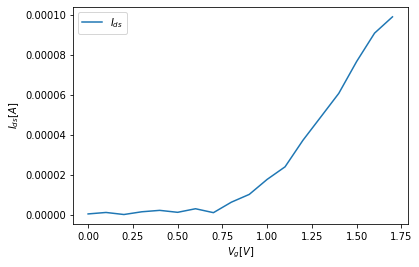

In [25]:
# plot 
from matplotlib import pyplot as plt

plt.plot(Vgs, Ids, label="$I_{ds}$")
plt.legend()
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{g}[V]$")
plt.show()

In [26]:
# if the data looks nice, save it!
# example :
Lab2_data_nFETVgIds = [Vgs,Ids]
# save to csv file
np.savetxt('./data/Lab2_data_nFETVgIds_saturated.csv', Lab2_data_nFETVgIds, delimiter=',')

In [86]:
Vgs, Ids = np.loadtxt('./data/Lab2_data_nFETVgIds_saturated.csv', delimiter=',')

In [87]:
# extract the valid range and plot sqrt(Ids) vs Vgs
v_t0 = next(Vg for Vg, Id in zip(Vgs, Ids) if Id > 1e-5)
print(f"Threshold value is at Vg = {v_t0}")
ohmic_start_index = Vgs.tolist().index(v_t0)


Threshold value is at Vg = 0.9


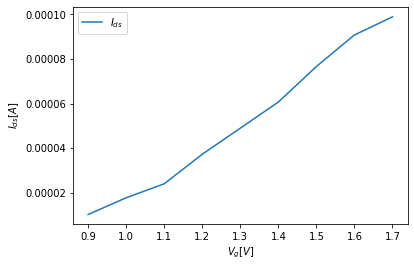

In [88]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)
plt.plot(Vgs[ohmic_start_index:], Ids[ohmic_start_index:], label="$I_{ds}$")
plt.legend()
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{g}[V]$")
plt.show()

**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [89]:
# V_T0 
v_t0 = Vgs[ohmic_start_index]
print(f"v_t0: {v_t0}")

v_t0: 0.9


> $I_{dsat} = \frac{1}{2} \beta(V_g - V_{T0})^2$   
> $\Rightarrow \sqrt{I_{dsat}} = \frac{1}{4} \sqrt{\beta}(V_g - V_{T0})$  
> $m := \rm{slope\ of\ } \sqrt{I_{dsat}}(V_g)$   
> $\Rightarrow \beta = (4m)^2$


In [91]:
# beta
delta_Ids = np.sqrt(Ids[-1]) - np.sqrt(Ids[ohmic_start_index])
delta_Vgs = Vgs[-1] - Vgs[ohmic_start_index]
m = delta_Ids / delta_Vgs
beta_n_sat = (4*m)**2

print(f"Beta: {beta_n_sat}")

Beta: 0.0011362012185156772


## 6.2 P-FET

**(a)** Configure the chip following [Section 4.3](#config_pfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region

* What will be the fixed value for bulk, source and drain voltages?

In [27]:
# Send a reset signal to the board, check if the LED blinks
p.reset(pyplane.ResetType.Soft)

<TeensyStatus.Success: 0>

In [28]:
# Configure PMOS, set the demultiplexer
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine1, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

In [29]:
# set bulk voltage
p.set_voltage(pyplane.DacChannel.AIN1, 1.8)

time.sleep(0.05)  # wait for it to settle

# set source voltage
p.set_voltage(pyplane.DacChannel.GO23, 1.8)

# set drain voltage
p.set_voltage(pyplane.DacChannel.GO21, 0.0)

# Print I_ds for checking 
Ids = p.read_current(pyplane.AdcChannel.GO21_N)
print(f"Ids: {Ids}")

Ids: 2.8686523364740424e-05


* For very close voltages, you may want to call `get_set_voltage` to check the actual output of the DAC.

In [30]:
# get set voltage
Vs_n = p.get_set_voltage(pyplane.DacChannel.GO23)
print("The source voltage is set to {} V".format(Vs_n))

# get set voltage
Vd_n = p.get_set_voltage(pyplane.DacChannel.GO21)
print("The drain voltage is set to {} V".format(Vd_n))

The source voltage is set to 1.7982406616210938 V
The drain voltage is set to 0.0 V


* Data aquisition

In [31]:
# sweep gate voltage
import time
import numpy as np 

# Get the leakage current, Read Ids=Ids0 at Vg = 0
p.set_voltage(pyplane.DacChannel.AIN0, 0.0)
time.sleep(0.5) # wait 0.5 second for it to settle
Is0_n = p.read_current(pyplane.AdcChannel.GO21_N)
print(f"Offset Is0_n: {Is0_n} A")

Vgs = np.arange(0.0, 1.8, 0.1)
Ids = []

for Vg in Vgs:
    # set gate voltage
    p.set_voltage(pyplane.DacChannel.AIN0, Vg)
    
    print(f"The gate voltage is set to {Vg:.2f} V")   ## print the gate voltage
    
    time.sleep(0.05)  # wait for it to settle
    # read I_{ds}
    Id = p.read_current(pyplane.AdcChannel.GO21_N)
    
    print(f"The measured source current is {Id} A")  ## print the raw data
    
    # substract leakage current    
    Id -= Is0_n
    print(f"The leakage corrected Ids is {Id}")
    Ids.append(Id)


Offset Is0_n: 2.9443359380820766e-05 A
The gate voltage is set to 0.00 V
The measured source current is 2.922363273683004e-05 A
The leakage corrected Ids is -2.1972664399072528e-07
The gate voltage is set to 0.10 V
The measured source current is 2.4047851184150204e-05 A
The leakage corrected Ids is -5.395508196670562e-06
The gate voltage is set to 0.20 V
The measured source current is 2.2167969291331246e-05 A
The leakage corrected Ids is -7.27539008948952e-06
The gate voltage is set to 0.30 V
The measured source current is 1.6674805010552518e-05 A
The leakage corrected Ids is -1.2768554370268248e-05
The gate voltage is set to 0.40 V
The measured source current is 1.5039062418509275e-05 A
The leakage corrected Ids is -1.4404296962311491e-05
The gate voltage is set to 0.50 V
The measured source current is 1.1987304787908215e-05 A
The leakage corrected Ids is -1.745605459291255e-05
The gate voltage is set to 0.60 V
The measured source current is 8.813476597424597e-06 A
The leakage correct

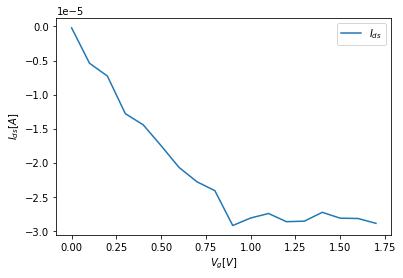

In [33]:
# plot 
from matplotlib import pyplot as plt

plt.plot(Vgs, Ids, label="$I_{ds}$")
plt.legend()
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{g}[V]$")
plt.show()

In [35]:
# if the data looks nice, save it!
# example :
Lab2_data_pFETVgIds = [Vgs,Ids]
# save to csv file
np.savetxt('./data/Lab2_data_pFETVgIds_saturated.csv', Lab2_data_pFETVgIds, delimiter=',')

* Data aquisition

In [92]:
import numpy as np
import matplotlib.pyplot as plt
Vgs, Ids = np.loadtxt('./data/Lab2_data_pFETVgIds_saturated.csv', delimiter=',')

In [93]:
# extract the valid range and plot sqrt(Ids) vs Vgs
v_t0 = next(Vg for Vg, Id in zip(Vgs, Ids) if Id < -2.3e-5)
print(f"Threshold value is at Vg = {v_t0}")
ohmic_end_index = Vgs.tolist().index(v_t0)

Threshold value is at Vg = 0.8


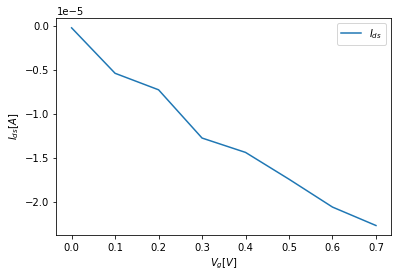

In [94]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)
plt.plot(Vgs[:ohmic_end_index], Ids[:ohmic_end_index], label="$I_{ds}$")
plt.legend()
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{g}[V]$")
plt.show()

**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [95]:
# V_T0
v_t0 = Vgs[ohmic_end_index]
print(f"v_t0: {v_t0}")

v_t0: 0.8


In [11]:
# beta
delta_Ids = Ids[ohmic_end_index] - Ids[0]
delta_Vgs = Vgs[ohmic_end_index] - Vgs[0]
m = delta_Ids / delta_Vgs
Vs = 1.8 #we forgot to save the variable
beta_p = m / Vs
print(f"Beta: {beta_p}")

Beta: -1.6530354842972076e-05


## 6.3 Comparisons

* Are the measurements of $V_{T0}$ and $\beta$ from the saturation measurement consistent with the values obtained in the ohmic region? 

* Which is a better approximation, the linear one or the quadratic?

# 7 Early effect

This experiment studies how Early voltage scales with transistor current; in particular, how valid are the simple assumptions about channel length modulation?

**You only need to do N-FET**

**(a)** Measure $I_{ds}$ vs $V_{ds}$ for different $V_{gs}$

In [8]:
# Send a reset signal to the board, check if the LED blinks
p.reset(pyplane.ResetType.Soft)

<TeensyStatus.Success: 0>

In [9]:
# Configure PMOS, set the demultiplexer
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

In [10]:
# set source voltage
p.set_voltage(pyplane.DacChannel.GO20, 0.0)


0.0

* Data aquisition

In [18]:
# sweep gate voltage
import time
import numpy as np

# Get the leakage current, Read Ids=Ids0 at Vg = 0
p.set_voltage(pyplane.DacChannel.AIN0, 0.0)
time.sleep(0.5) # wait 0.5 second for it to settle
Is0_n = p.read_current(pyplane.AdcChannel.GO21_N)

print(f"Offset Is0_n: {Is0_n} A")

Vds = np.arange(0.0, 1.8, 0.1)
Vgs = np.arange(0.8, 1.8, 0.2)
Ids = {}
for Vg in Vgs:
    Ids[Vg] = []

for Vd in Vds:
    for Vg in Vgs:
        p.set_voltage(pyplane.DacChannel.GO22, Vd)
        # Get the leakage current, Read Ids=Ids0 at Vg = 0
        p.set_voltage(pyplane.DacChannel.AIN0, 0.0)
        time.sleep(0.5) # wait 0.5 second for it to settle
        Is0_n = p.read_current(pyplane.AdcChannel.GO21_N)
        p.set_voltage(pyplane.DacChannel.AIN0, Vg)
        
        time.sleep(0.05)  # wait for it to settle
        # read I_{ds}
        Id = p.read_current(pyplane.AdcChannel.GO20_N)
        
        
        # substract leakage current    
        Id -= Is0_n
        Ids[Vg].append(Id)


Offset Is0_n: 6.103515488575795e-07 A


* Include a single plot showing all data on a semilogy plot.

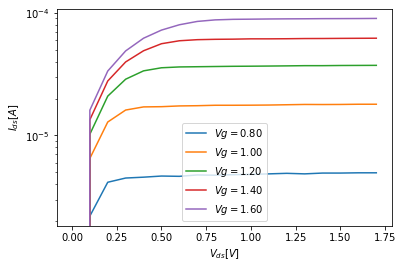

In [20]:
# plot
from matplotlib import pyplot as plt
for Vg, current_Ids in Ids.items():
    plt.semilogy(Vds, current_Ids, label=f"$Vg={Vg:.2f}$")
plt.ylabel("$I_{ds}[A]$")
plt.xlabel("$V_{ds}[V]$")
plt.legend()
plt.show()

In [25]:
# if the data looks nice, save it!
# example :
for Vg, current_Ids in Ids.items():
    Lab2_data_nFETVgIds = [Vds,current_Ids]
    # save to csv file
    np.savetxt(f'./data/early/Lab2_data_nFETVgIds_{Vg:.2f}.csv', Lab2_data_nFETVgIds, delimiter=',')

* Can you see how the saturation voltage increases with the gate overdrive $V_G-V_T$ in strong inversion?

**(b)** Compute the Early voltage 

In [3]:
Vgs = np.arange(0.8, 1.8, 0.2)
Vds = np.arange(0.0, 1.8, 0.1)
Ids = {}
for Vg in Vgs:
    filename = f'./data/early/Lab2_data_nFETVgIds_{Vg:.2f}.csv'
    Vds, current_Ids = np.loadtxt(filename, delimiter=',')
    Ids[Vg] = current_Ids

* Fit a line to the ”flat” part of each curve. Select a range of drain voltages to fit the line and use the same range for each curve, because the Early effect is actually curved in reality, and what you are actually seeing is the start of Drain Induced Barrier Lowering (DIBL) or impact ionization.

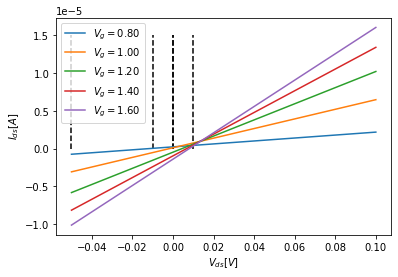

In [52]:
first_Ids = list(Ids.values())[0]
low_index = next(i for i, Id in enumerate(first_Ids) if Id > 0.0)
high_index = low_index + 1
ms = [(current_Ids[high_index] - current_Ids[low_index])/0.1 for current_Ids in Ids.values()]
y_0s = [current_Ids[low_index] - m*0.1 for m, current_Ids in zip(ms, Ids.values())]

x = np.array([-0.5, 0.1])
curves = [x * m + y_0 for m, y_0 in zip(ms, y_0s)]

for curve in curves:
    


* Plot the Early voltage vs drain current on a semilogx scale.

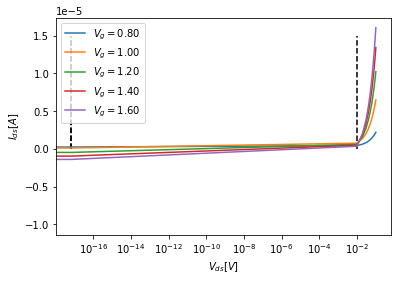

In [53]:

for Vg, curve in zip(Vgs, curves):
    plt.semilogx(x, curve, label=f"$V_g={Vg:.2f}$")
for curve in curves:
    V_e = next(Vd for Vd, y in zip(x, curve) if y > -1e-6 and y < 1e-6)
    plt.vlines(V_e, 0.0, 1.5e-5, linestyles='dashed', colors='black')
plt.xlabel("$V_{ds}[V]$")
plt.ylabel("$I_{ds}[A]$")
plt.legend()
plt.show()


* Comment on your results: How constant is the Early voltage with drain current? Speculate on the reasons for your observations.

# 8 Congratulations

**If you did everything in this lab, you have done a lot! This is probably the most difficult but also one of the most important labs, because practical and intuitive knowledge of transistor characteristics is crucial in understanding and synthesizing new circuits.**

# 9 What we expect

How transistors work above threshold.  

What is the linear or triode region and what is the saturation region?

How does the linear region depend on gate and threshold voltage?

What is the _overdrive_?

What is the specific current?

How the Early effect comes about?

Typical values for Early voltage.

How to sketch graphs of transistor current vs gate voltage and drain-source voltage.

How above-threshold transistors go into saturation and why the saturation voltage is equal to the gate overdrive.
Can you write the above-threshold current equations?

How does above-threshold current depend on $W/L$, $C_{ox}$, and mobility $\mu$?

How do transconductance and drain resistance combine to generate voltage gain? 
And what is the intrinsic voltage gain of a transistor?

What effect does velocity saturation have on transistor operation, specifically, how does it change the relation between saturation current and gate voltage? What is DIBL (drain induced barrier lowering) and II (impact ionization)?

What is the dominant source of mismatch?

How does transistor mismatch scale with transistor size?

What are typical values of transistor threshold voltage mismatch? 